In [18]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c20f4278bce52a8e48a43f32671b212d735de34424ff99394c69576a1828d79b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [19]:
# ライブラリ
import random
import numpy as np
from scipy import stats


# 乱数のシードを固定
random.seed(1234)
np.random.seed(1234)

# 標準正規分布の生成用
from numpy.random import randn

# 描画
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

## ZからYへ因果が存在する場合
変数Z →　変数Y

In [4]:
# ノイズの生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Z = e_z
Y = 2*Z + e_y



In [10]:
# 相関関係
print(np.corrcoef(Z, Y))

[[1.         0.89379611]
 [0.89379611 1.        ]]


　データを描画する


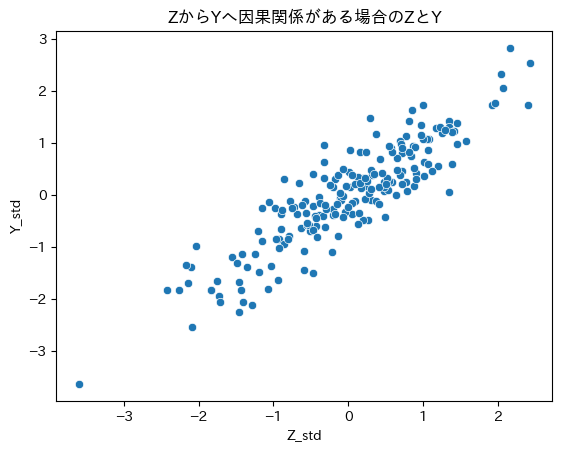

In [20]:
# 標準化
Z_std = stats.zscore(Z)
Y_std = stats.zscore(Y)

# 散布図を描画
sns.scatterplot(x=Z_std, y=Y_std)
plt.xlabel('Z_std')
plt.ylabel('Y_std')
plt.title('ZからYへ因果関係がある場合のZとY')
plt.show()

## 擬似相関１：因果が逆


In [22]:
# ノイズの生成
num_date = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
y = e_y
z = 2*y + e_z

# 相関関係を求める
np.corrcoef(z, y)

array([[1.        , 0.90390263],
       [0.90390263, 1.        ]])

実装コードを見ると、まずYを作成して、YをもとにZを作成している。そのため、因果関係はYからZである。相関係数は　約0.90


Text(0.5, 1.0, '擬似相関 : 因果が逆')

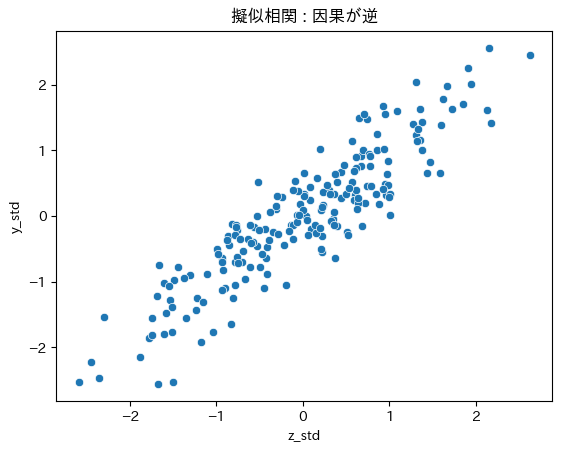

In [24]:
# 標準化
z_std = stats.zscore(z)
y_std = stats.zscore(y)

# 散布図を描画
sns.scatterplot(x=z_std, y=y_std)
plt.xlabel('z_std')
plt.ylabel('y_std')
plt.title('擬似相関 : 因果が逆')

## 擬似相関２ : 共通の原因(交絡)

変数Zと変数Yの間には因果関係がなく、共通の原因(交絡因子)変数xが存在している場合

In [25]:
# ノイズの生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

# データの生成
z = 3.3*e_x + e_z
y = 3.3*e_x + e_y

# 相関係数を求める
np.corrcoef(z, y)

array([[1.        , 0.90572419],
       [0.90572419, 1.        ]])

変数Zと変数Yは共通の変数x(e_x)から因果の矢印が伸びている。変数Zと変数Yを計算する時には、お互いに変数Yと変数Zを含んでいない。
しかし、変数Zと変数Yの相関係数は0.9であり、変数間に因果関係がないにも関わらず、高い相関係数

Text(0.5, 1.0, '擬似相関 : 共通の原因(交絡)')

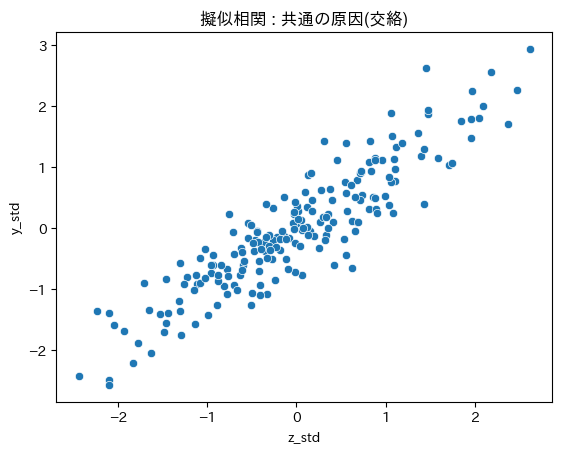

In [28]:
# 標準化
z_std = stats.zscore(z)
y_std = stats.zscore(y)

# 散布図を描画
sns.scatterplot(x=z_std, y=y_std)
plt.xlabel('z_std')
plt.ylabel('y_std')
plt.title('擬似相関 : 共通の原因(交絡)')

分布を見ても、「変数間に直接的因果関係が存在しなくても、共通変数(交絡因子)から間接的な因果関係が生まれ、相関係数が大きくなる場合(擬似相関)」
そして、「データの見た目から、直接的な因果関係の有無がわからない」

## 擬似相関3 : 合流点バイアス

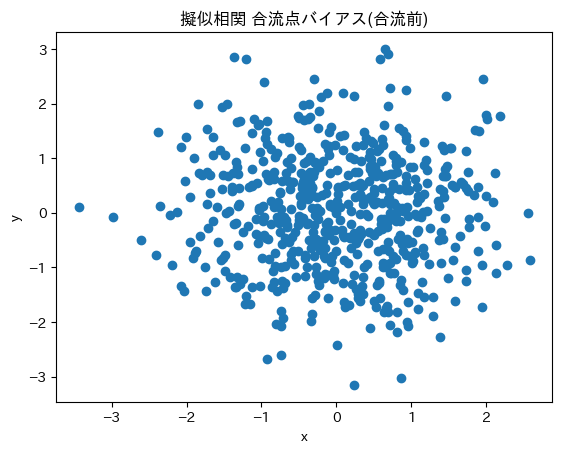

In [31]:
# ノイズの生成
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成
x = e_x
y = e_y

#. 描画
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('擬似相関 合流点バイアス(合流前)')
plt.show()


この図は、正規分布に従う変数xと変数yを独立にしてプロット。
２つの変数間には相関関係がない

In [33]:
np.corrcoef(x, y)

array([[ 1.        , -0.02934398],
       [-0.02934398,  1.        ]])

合流点バイアスのプログラム。新たに変数z = x + yと作成(合流点を作成),その値が０以上のみを選抜する。

In [45]:
# ノイズの生成
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成
x = e_x  # 配列
y = e_y  # 配列

# 合流点を作成
z = x + y

# 新たな合流点での条件を満たす変数の用意
x_new = np.array([])
y_new = np.array([])

# zの値が０以上で選抜してnew変数に追加
for i in range(num_data):
  if z[i] > 0.0:
    x_new = np.append(x_new, x[i])  # 後で解説
    y_new = np.append(y_new, y[i])

Text(0.5, 1.0, '擬似相関 : 合流点バイアス')

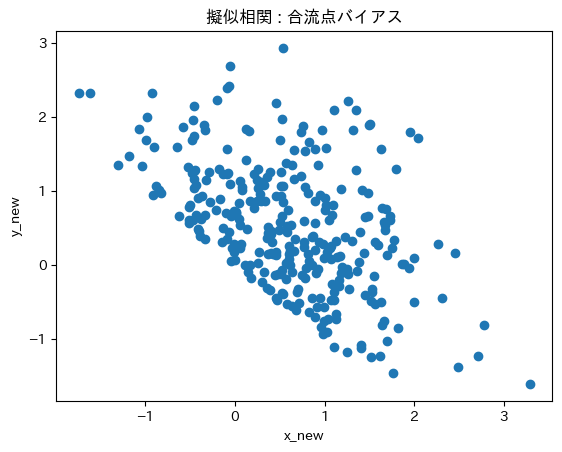

In [47]:
# 散布図
plt.scatter(x_new, y_new)
plt.xlabel('x_new')
plt.ylabel('y_new')
plt.title('擬似相関 : 合流点バイアス')

散布図をみると、負の相関がありそう。

In [48]:
np.corrcoef(x_new, y_new)

array([[ 1.        , -0.49183353],
       [-0.49183353,  1.        ]])

元々因果関係も相関関係もなかった変数xと変数yだけど、"合流"したことで、変数xと変数yの間に直接的な因果関係がなくても変数zを介して擬似相関が発生している。